In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
df_train = pd.read_csv('/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/data/robustness_study/preprocessed/train.csv', sep='\t', index_col=0)
df_val = pd.read_csv('/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/data/robustness_study/preprocessed/val.csv', sep='\t', index_col=0)
df_test = pd.read_csv('/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/data/robustness_study/preprocessed/test.csv', sep='\t', index_col=0)

In [4]:
df_train.head()

,text,target
0,come back hoe <user> <url>,1
1,rt <user> bouta take a shower just to fuck yo ...,1
2,stiff armed his hoe ass lmao,1
3,<user> ugly goldigging cunt u probably have an...,1
4,fuck bitches get money aye,1


### Number of tokens (for BERT tokenization)

In [5]:
df_train['num_tokens'] = df_train['text'].apply(lambda x: len(x.split()))
df_val['num_tokens'] = df_val['text'].apply(lambda x: len(x.split()))
df_test['num_tokens'] = df_test['text'].apply(lambda x: len(x.split()))

In [19]:
np.mean(df_train['num_tokens'])

14.471602945626955

In [20]:
# overall mean number of tokens
np.mean([np.mean(df_train['num_tokens']), np.mean(df_val['num_tokens']), np.mean(df_test['num_tokens'])])

14.589475021662972

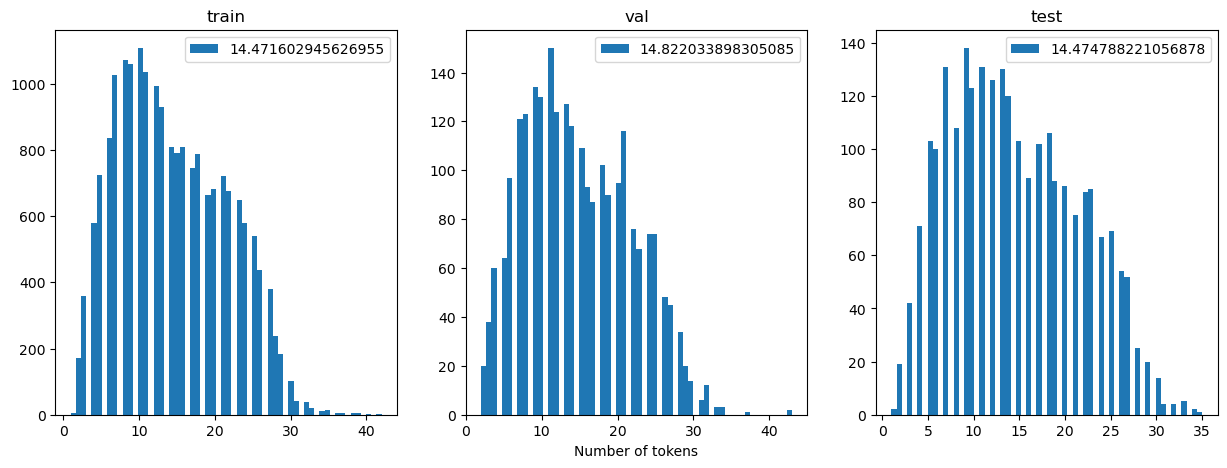

In [16]:
# column subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].hist(df_train['num_tokens'], bins=60, label=np.mean(df_train['num_tokens']))
axes[0].set_title('train')
axes[0].legend()
axes[1].hist(df_val['num_tokens'], bins=60, label=np.mean(df_val['num_tokens']))
axes[1].set_title('val')
axes[1].set_xlabel('Number of tokens')
axes[1].legend()
axes[2].hist(df_test['num_tokens'], bins=60, label=np.mean(df_test['num_tokens']))
axes[2].set_title('test')
axes[2].legend();

In [7]:
df_train['num_tokens'].describe()

count    19826.000000
mean        14.471603
std          7.075127
min          1.000000
25%          9.000000
50%         14.000000
75%         20.000000
max         42.000000
Name: num_tokens, dtype: float64

In [8]:
print(df_train['target'].value_counts(normalize=True))
print(df_val['target'].value_counts(normalize=True))
print(df_test['target'].value_counts(normalize=True))

target
1    0.832039
0    0.167961
Name: proportion, dtype: float64
target
1    0.832123
0    0.167877
Name: proportion, dtype: float64
target
1    0.831787
0    0.168213
Name: proportion, dtype: float64


In [21]:
df_all = pd.concat([df_train, df_val, df_test])

In [22]:
df_all['num_tokens'].describe()

count    24783.000000
mean        14.506960
std          7.060367
min          1.000000
25%          9.000000
50%         14.000000
75%         20.000000
max         43.000000
Name: num_tokens, dtype: float64

In [40]:
df_all

,text,target,num_tokens
0,come back hoe <user> <url>,1,5
1,rt <user> bouta take a shower just to fuck yo ...,1,12
2,stiff armed his hoe ass lmao,1,6
3,<user> ugly goldigging cunt u probably have an...,1,11
4,fuck bitches get money aye,1,5
...,...,...,...
2474,<user> rape cannibalism you wont recognize the...,0,16
2475,rt <user> dc fri <number> <number> bengali har...,0,21
2476,define wigga,0,2
2477,rt <user> yelled out come on bitch at myself b...,1,21


In [23]:
df_all['target'].value_counts(normalize=True)

target
1    0.832022
0    0.167978
Name: proportion, dtype: float64

In [32]:
# how much of text is made up of which entities
entity_patterns = {
    'USER': '<user>',
    'NUMBER': '<number>',
    'HASHTAG': '<hashtag>',
    'URL': '<url>',
    'EMOTICON': '<emoticon>',
    'EMOJI': '<emoji>'
}

entity_counts = {entity: 0 for entity in entity_patterns.keys()}
entity_counts['NON_ENTITY'] = 0

for text in df_all['text']:
    non_entity_text = text
    for entity, pattern in entity_patterns.items():
        matches = re.findall(pattern, text)
        entity_counts[entity] += len(matches)
        non_entity_text = re.sub(pattern, '', non_entity_text)
    
    # Assuming non-entity text is any text that's not an entity. Adjust as needed.
    non_entities = len(re.findall(r'\b\w+\b', non_entity_text))
    entity_counts['NON_ENTITY'] += non_entities

print(entity_counts)


{'USER': 19283, 'NUMBER': 3246, 'HASHTAG': 3501, 'URL': 3058, 'EMOTICON': 81, 'EMOJI': 7011, 'NON_ENTITY': 323978}


In [33]:
# % of all tokens that are entities, i.e., for all dict keys apart from NON_ENTITY
entity_counts_no_non_entity = {k: v for k, v in entity_counts.items() if k != 'NON_ENTITY'}


In [34]:
entity_counts_no_non_entity

{'USER': 19283,
 'NUMBER': 3246,
 'HASHTAG': 3501,
 'URL': 3058,
 'EMOTICON': 81,
 'EMOJI': 7011}

In [35]:
total_entity_tokens = sum(entity_counts_no_non_entity.values())

In [38]:
total_entity_tokens / sum(entity_counts.values())

0.1004559110168315